### Load libraries

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

!pip install mne
!pip install pyvistaqt
!pip install ipywidgets

import ipywidgets
import mne
from mne.preprocessing import find_bad_channels_maxwell

%matplotlib tk

### Load datafiles

In [5]:
# file_name = "run03"
# file_name = "run06"
# file_name = "run09"
file_name = "run06"

# sample_data_folder = "/Volumes/PortableSSD/SACSAMP/sacsamp01_s01/"
# sample_data_folder = "/Volumes/PortableSSD/SACSAMP/sacsamp04_s04/"
sample_data_folder = "/Volumes/PortableSSD/SACSAMP/sacsamp18_s18/"
# sample_data_folder = "/Volumes/PortableSSD/SACSAMP/sacsamp22_s22/"

sample_data_raw_file = os.path.join(sample_data_folder, file_name + '.fif')

# Fine calibration file (site-specific info about sensor orientation and calibration)
fine_cal_file = os.path.join(sample_data_folder, "sss_config/sss_cal_3101_160108.dat")

# Crosstalk compensation file (reduces interference between co-located magnetometers and gradiometers)
crosstalk_file = os.path.join(sample_data_folder, "sss_config/ct_sparse.fif")

raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False, allow_maxshield=True, preload=True)
# “Projection items” are SSP projectors calculated to remove environmental noise

# meg = MEG channels
# stim = Stimulus channels
# eog =  EOG channels
# ecg = ECG channels
# emg =  EMG channels
# misc = Miscellaneous analog channels
# chpi = Continuous HPI coil channels
# ias = Internal Active Shielding data
# syst = System status channel information
# bio = Bio channels

# print(raw.info)
# print(raw.info["ch_names"])

# events = mne.find_events(raw, stim_channel="STI101", output='onset', consecutive='increasing', min_duration=0.001, shortest_event=1, mask=None, uint_cast=False, mask_type='and', initial_event=False, verbose=None)
# print(events)

/var/folders/q2/tlz2mlq51jbd2v369y_80nkh0000gn/T/ipykernel_12923/2781882685.py:19: RuntimeWarning: This filename (/Volumes/PortableSSD/SACSAMP/sacsamp18_s18/run06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False, allow_maxshield=True, preload=True)
/var/folders/q2/tlz2mlq51jbd2v369y_80nkh0000gn/T/ipykernel_12923/2781882685.py:19: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False, allow_maxshield=True, preload=True)


### Plot BIO/MISC channels

In [21]:
plt.close()
start = 1000
timestamps = 1000
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

plt.sca(axes[0])
plt.plot(np.transpose(raw.get_data(picks="bio")[2,start:start+timestamps]), label='BIO003')
plt.legend(loc=(1.,0.5))
plt.ylabel("EMG (respiratory)")

plt.sca(axes[1])
plt.plot(np.transpose(raw.get_data(picks="misc")[0,start:start+timestamps]), label='MISC001')
plt.legend(loc=(1.,0.5))
plt.ylabel("ECG")

plt.sca(axes[2])
plt.plot(np.transpose(raw.get_data(picks="misc")[1,start:start+timestamps]), label='MISC002')
plt.legend(loc=(1.,0.5))
plt.ylabel("ECG")

Text(0, 0.5, 'ECG')

In [23]:
plt.close()
start = 0
timestamps = 10000
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

plt.sca(axes[0])
plt.plot(np.transpose(raw.get_data(picks="bio")[0,start:start+timestamps]), label='BIO001')  # HEOG
plt.plot(np.transpose(raw.get_data(picks="bio")[1,start:start+timestamps]), label='BIO002')  # VEOG
plt.legend(loc=(1.,0.5))
plt.ylabel("EOG")

plt.sca(axes[1])
plt.plot(np.transpose(raw.get_data(picks="misc")[2,start:start+timestamps]), label='MISC007')  # V eye pos
plt.plot(np.transpose(raw.get_data(picks="misc")[3,start:start+timestamps]), label='MISC008')  # H eye pos
plt.legend(loc=(1.,0.5))
plt.ylabel("Eye position")

plt.sca(axes[2])
plt.plot(np.transpose(raw.get_data(picks="misc")[4,start:start+timestamps]), label='MISC009')  # Pupil
plt.legend(loc=(1.,0.5))
plt.ylabel("Pupil")

Text(0, 0.5, 'Pupil')

### Convert events to annotations

In [7]:
if file_name.endswith('01') or file_name.endswith('04') or file_name.endswith('07') or file_name.endswith('10'):
    dict_cond = {
        12: "BL_ACT",       
        #16: "",       
        20: "FP_ACT",       
        #24: "",      
        28: "RE_ON",       
        32: "RE_OFF",      
    }
elif file_name.endswith('02') or file_name.endswith('05') or file_name.endswith('08') or file_name.endswith('11'):
    dict_cond = {
        13: "BL_PAS",
        #17: "",
        21: "FP_PAS",
        #25: "",
        29: "RE_ON",
        33: "RE_OFF"
    }
elif file_name.endswith('03') or file_name.endswith('06') or file_name.endswith('09') or file_name.endswith('12'):
    dict_cond = {
        14: "BL_FIX",  
        #18: "",
        22: "FP_FIX",
        #26: "",
        30: "RE_ON",
        34: "RE_OFF"
    }

dict_stim = {
    41: "S01",       
    42: "S02",
    43: "S03",
    44: "S04",
    45: "S05",
    46: "S06",
    47: "S07",
    48: "S08",
    49: "S09",
    50: "S10",
    51: "S11",
    52: "S12",
    81: "T01",      
    82: "T02",
    83: "T03",
    84: "T04",
    85: "T05",
    86: "T06",
    87: "T07",
    88: "T08",
    89: "T09",
    90: "T10",
    91: "T11",
    92: "T12"
}

mapping = dict_stim | dict_cond

events = mne.find_events(raw, stim_channel="STI101", output='onset', consecutive='increasing', min_duration=0.001, shortest_event=1, mask=None, uint_cast=False, mask_type='and', initial_event=False, verbose=None)

annot_from_events = mne.annotations_from_events(
    events=events,
    event_desc=mapping,
    sfreq=raw.info["sfreq"],
    orig_time=raw.info["meas_date"],
)

raw.set_annotations(annot_from_events);

544 events found on stim channel STI101
Event IDs: [14 18 22 26 30 32 34 41 42 43 44 45 46 47 48 49 50 51 52 81 82 83 84 85
 86 87 88 89 90 91 92 98]


### Plot raw data

Using matplotlib as 2D backend.


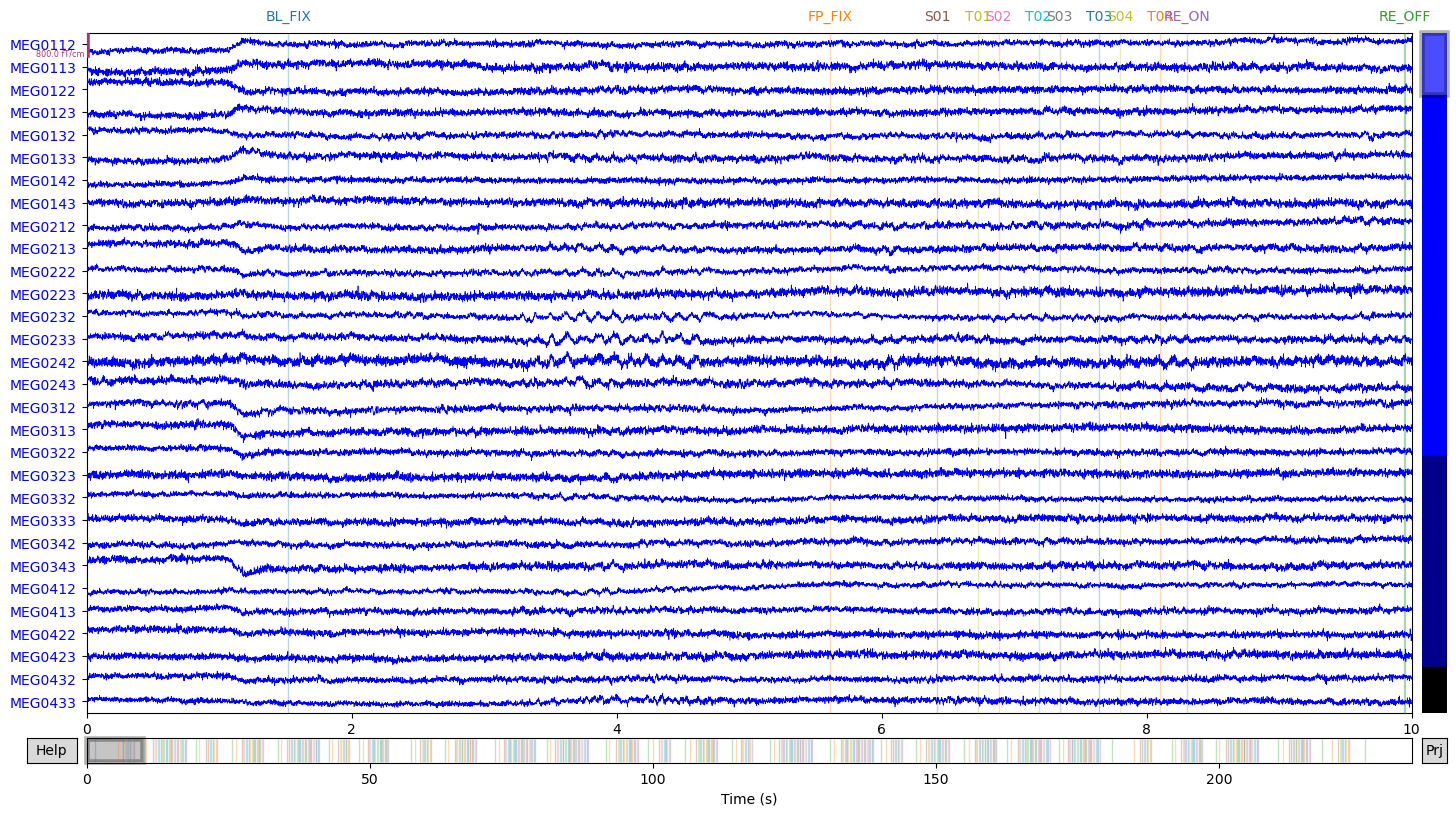

In [12]:
raw.plot(duration=10, n_channels=30)

### Find bad channels

By default, applies a low-pass filter with a cutoff frequency of 40 Hz, and channels are detected as bad when the number of segments in which they exceed the limit of noisiness is higher than 5.

In [15]:
raw.info["bads"] = []
raw_check = raw.copy()
auto_noisy_chs, auto_flat_chs, auto_scores = find_bad_channels_maxwell(
    raw_check,
    cross_talk=crosstalk_file,
    calibration=fine_cal_file,
    h_freq=40,
    min_count=5,
    return_scores=True,
    verbose=False,
)

# Update the list of bad channels
bads = raw.info["bads"] + auto_noisy_chs + auto_flat_chs
raw.info["bads"] = bads

print(bads)

[]


### Vizualization of noisy channels

In [510]:
# ch_type = "grad"
ch_type = "mag"
ch_subset = auto_scores["ch_types"] == ch_type
ch_names = auto_scores["ch_names"][ch_subset]
scores = auto_scores["scores_noisy"][ch_subset]
limits = auto_scores["limits_noisy"][ch_subset]
bins = auto_scores["bins"]
bin_labels = [f"{start:3.3f} – {stop:3.3f}" for start, stop in bins]
data_to_plot = pd.DataFrame(
    data=scores,
    columns=pd.Index(bin_labels, name="Time (s)"),
    index=pd.Index(ch_names, name="Channel"),
)

fig, ax = plt.subplots(1, 2, figsize=(12, 8), layout="constrained")

fig.suptitle(
    f"Automated noisy channel detection: {ch_type}", fontsize=16, fontweight="bold"
)
sns.heatmap(data=data_to_plot, cmap="Reds", cbar_kws=dict(label="Score"), ax=ax[0])
[
    ax[0].axvline(x, ls="dashed", lw=0.25, dashes=(25, 15), color="gray")
    for x in range(1, len(bins))
]
ax[0].set_title("All Scores", fontweight="bold")

# Adjust the color range to highlight segments that exceeded the limit
sns.heatmap(
    data=data_to_plot,
    vmin=np.nanmin(limits),
    cmap="Reds",
    cbar_kws=dict(label="Score"),
    ax=ax[1],
)
[
    ax[1].axvline(x, ls="dashed", lw=0.25, dashes=(25, 15), color="gray")
    for x in range(1, len(bins))
]
ax[1].set_title("Scores > Limit", fontweight="bold")

Text(0.5, 1.0, 'Scores > Limit')

### Vizualization of flat channels

In [514]:
# ch_type = "grad"
ch_type = "mag"
ch_subset = auto_scores["ch_types"] == ch_type
ch_names = auto_scores["ch_names"][ch_subset]
scores = auto_scores["scores_flat"][ch_subset]
limits = auto_scores["limits_flat"][ch_subset]
bins = auto_scores["bins"]

bin_labels = [f"{start:3.3f} – {stop:3.3f}" for start, stop in bins]
data_to_plot = pd.DataFrame(
    data=scores,
    columns=pd.Index(bin_labels, name="Time (s)"),
    index=pd.Index(ch_names, name="Channel"),
)

fig, ax = plt.subplots(1, 2, figsize=(12, 8), layout="constrained")
fig.suptitle(
    f"Automated flat channel detection: {ch_type}", fontsize=16, fontweight="bold"
)
sns.heatmap(data=data_to_plot, cmap="Reds", cbar_kws=dict(label="Score"), ax=ax[0])
[
    ax[0].axvline(x, ls="dashed", lw=0.25, dashes=(25, 15), color="gray")
    for x in range(1, len(bins))
]
ax[0].set_title("All Scores", fontweight="bold")

# Adjust the color range to highlight segments that exceeded the limit
sns.heatmap(
    data=data_to_plot,
    vmax=np.nanmax(limits),
    cmap="Reds",
    cbar_kws=dict(label="Score"),
    ax=ax[1],
)
[
    ax[1].axvline(x, ls="dashed", lw=0.25, dashes=(25, 15), color="gray")
    for x in range(1, len(bins))
]
ax[1].set_title("Scores > Limit", fontweight="bold")

Text(0.5, 1.0, 'Scores > Limit')

### Manual detection of bad channels


In [ ]:
# raw.info["bads"] += ["MEG2313"]

### Run SSS and Maxwell filter


In [17]:
raw_sss = mne.preprocessing.maxwell_filter(
    raw, cross_talk=crosstalk_file, calibration=fine_cal_file, verbose=True
)

Maxwell filtering raw data
102 of 102 magnetometer types replaced with T3.
    No bad MEG channels
    Processing 204 gradiometers and 102 magnetometers
    Using fine calibration sss_cal_3101_160108.dat
        Adjusting non-orthogonal EX and EY
        Adjusted coil orientations by (μ ± σ): 0.5° ± 0.4° (max: 1.7°)
    Automatic origin fit: head of radius 84.4 mm
    Using origin -2.6, 13.9, 52.2 mm in the head frame
        Using 90/95 harmonic components for    0.000  (75/80 in, 15/15 out)
    Using loaded raw data
    Processing 23 data chunks
[done]


### Plot before and after filtering


In [ ]:
#raw.pick(["meg"]).plot(duration=2, butterfly=True)
#raw_sss.pick(["meg"]).plot(duration=2, butterfly=True)

#raw.plot(butterfly=True, title='Before')
#raw_sss.plot(butterfly=True, title='After')

In [364]:
# Plot power spectral density (PSD) for each sensor type

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
raw.compute_psd(fmax=50).plot(average=True, picks="data", exclude="bads", amplitude=False, axes=[ax1, ax2])
raw_sss.compute_psd(fmax=50).plot(average=True, picks="data", exclude="bads", amplitude=False, axes=[ax3, ax4])

ax1.set_ylim(0, 70)
ax2.set_ylim(0, 70)
ax3.set_ylim(0, 70)
ax4.set_ylim(0, 70)

ax1.set_title("Grad Before")
ax2.set_title("Mag Before")
ax3.set_title("Grad After")
ax4.set_title("Mag After")

Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


Text(0.5, 1.0, 'Mag After')

In [55]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
raw.compute_psd(fmax=50).plot(picks="data", amplitude=False, axes=[ax1, ax2])
raw_sss.compute_psd(fmax=50).plot(picks="data", amplitude=False, axes=[ax3, ax4])

ax1.set_ylim(0, 70)
ax2.set_ylim(0, 70)
ax3.set_ylim(0, 70)
ax4.set_ylim(0, 70)

ax1.set_title("Grad Before")
ax2.set_title("Mag Before")
ax3.set_title("Grad After")
ax4.set_title("Mag After")

Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


Text(0.5, 1.0, 'Mag After')

### Save filtered data

In [19]:
raw_sss.save(os.path.join(sample_data_folder, file_name + '_sss.fif'),fmt='double',overwrite=True)

Overwriting existing file.
Writing /Volumes/PortableSSD/SACSAMP/sacsamp18_s18/run06_sss.fif


/var/folders/q2/tlz2mlq51jbd2v369y_80nkh0000gn/T/ipykernel_12923/2119325051.py:1: RuntimeWarning: This filename (/Volumes/PortableSSD/SACSAMP/sacsamp18_s18/run06_sss.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_sss.save(os.path.join(sample_data_folder, file_name + '_sss.fif'),fmt='double',overwrite=True)


Closing /Volumes/PortableSSD/SACSAMP/sacsamp18_s18/run06_sss.fif
[done]


[PosixPath('/Volumes/PortableSSD/SACSAMP/sacsamp18_s18/run06_sss.fif')]

### Low-frequency drifts

In [ ]:
mag_channels = mne.pick_types(raw.info, meg="grad")
raw.plot(duration=60, order=mag_channels, n_channels=len(mag_channels), remove_dc=False)

### Power line noise

In [ ]:
def add_arrows(axes):
    """Add some arrows at 60 Hz and its harmonics."""
    for ax in axes:
        freqs = ax.lines[-1].get_xdata()
        psds = ax.lines[-1].get_ydata()
        for freq in (60, 120, 180, 240):
            idx = np.searchsorted(freqs, freq)
            # get ymax of a small region around the freq. of interest
            y = psds[(idx - 4) : (idx + 5)].max()
            ax.arrow(
                x=freqs[idx],
                y=y + 18,
                dx=0,
                dy=-12,
                color="red",
                width=0.1,
                head_width=3,
                length_includes_head=True,
            )


fig = raw.compute_psd(fmax=250).plot(
    average=True, amplitude=False, picks="data", exclude="bads"
)
add_arrows(fig.axes[:2])

In [ ]:
meg_picks = mne.pick_types(raw.info, meg=True)
freqs = (60, 120, 180, 240)
raw_notch = raw.copy().notch_filter(freqs=freqs, picks=meg_picks)
for title, data in zip(["Un", "Notch "], [raw, raw_notch]):
    fig = data.compute_psd(fmax=250).plot(
        average=True, amplitude=False, picks="data", exclude="bads"
    )
    fig.suptitle(f"{title}filtered", size="xx-large", weight="bold")
    add_arrows(fig.axes[:2])

### Heartbeat artifacts (ECG)

In [ ]:
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)
ecg_epochs.plot_image(combine="mean")

### Ocular artifacts (EOG)

In [ ]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2))
eog_epochs.plot_image(combine="mean")
eog_epochs.average().plot_joint()

### Movement compensation (head position)

In [ ]:
n_active = mne.chpi.get_active_chpi(raw)
print(f"Average number of coils active during recording: {n_active.mean()}")

In [ ]:
chpi_freqs, ch_idx, chpi_codes = mne.chpi.get_chpi_info(info=raw.info)
print(f"cHPI coil frequencies extracted from raw: {chpi_freqs} Hz")

In [ ]:
chpi_amplitudes = mne.chpi.compute_chpi_amplitudes(raw)

In [ ]:
chpi_locs = mne.chpi.compute_chpi_locs(raw.info, chpi_amplitudes)

In [ ]:
head_pos = mne.chpi.compute_head_pos(raw.info, chpi_locs, verbose=True)
# mne.chpi.write_head_pos(fname, head_pos)
print(head_pos)

In [ ]:
mne.viz.plot_head_positions(head_pos, mode="traces", totals=True)

In [ ]:
mne.viz.plot_head_positions(head_pos, mode="field")

### Find events

In [ ]:
events = mne.find_events(raw_sss, stim_channel="STI101", output='onset', consecutive='increasing', min_duration=0.001, shortest_event=1, mask=None, uint_cast=False, mask_type='and', initial_event=False, verbose=None)
print(events[:5])    # Sample number | 0 | Integer event ID

### Create events dictionary

In [ ]:
event_dict_act = {
    "BL_ACT": 12,
    "FP_ACT": 20,
    "RE_ON": 28,
    "RE_OFF": 32
}

event_dict_pas = {
    "BL_PAS": 13,
    "FP_PAS": 21,
    "RE_ON": 29,
    "RE_OFF": 33
}

event_dict_fix = {
    "BL_FIX": 14,
    "FP_FIX": 22,
    "RE_ON": 30,
    "RE_OFF": 34
}

event_dict_stim = {
    "A01": 41,
    "A02": 42,
    "A03": 43,
    "A04": 44,
    "A05": 45,
    "A06": 46,
    "A07": 47,
    "A08": 48,
    "A09": 49,
    "A10": 50,
    "A11": 51,
    "A12": 52,
    "T01": 81,
    "T02": 82,
    "T03": 83,
    "T04": 84,
    "T05": 85,
    "T06": 86,
    "T07": 87,
    "T08": 88,
    "T09": 89,
    "T10": 90,
    "T11": 91,
    "T12": 92
}

### Create epochs

In [ ]:
event_dict = event_dict_stim | event_dict_fix

# Maximum peak-to-peak signal amplitude
reject_criteria = dict(
    mag=4000e-15,  # 4000 fT
    grad=4000e-13,  # 4000 fT/cm
)

epochs = mne.Epochs(
    raw,
    events,
    event_id=event_dict,
    tmin=-0.5,   # Time relative to each event at which to start each epoch
    tmax=1.0,    # Time relative to each event at which to end each epoch
    reject=reject_criteria,
    preload=True,
)

In [ ]:
epochs["A01"].plot(
    events=mne.pick_events(events, include=[81]),
    event_id=event_dict,
)

### Plot events

In [ ]:
chan_idx = [raw.ch_names.index("STI101")]
raw.plot(order=chan_idx, start=100, duration=5)

In [ ]:
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info["sfreq"], first_samp=raw.first_samp)

### Save epoched data

In [ ]:
epochs.save(os.path.join(sample_data_folder, file_name + '_epo.fif'),fmt='double',overwrite=True)